In [56]:
from labellines import labelLines
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

matplotlib.rc("font", size=16)
plt.style.use("tableau-colorblind10")

In [19]:
df = pd.read_excel("rmse_data.xlsx", index_col=0)
n_samples = df.samples.unique()
ortho_data = []
ortho_means = []
non_ortho_data = []
for samples in n_samples:
    slice = df[df.samples == samples]
    ortho_data.append(slice.ortho)
    ortho_means.append(slice.ortho.mean())
    non_ortho_data.append(slice.non_ortho)

[-0.47709914  2.72173432]


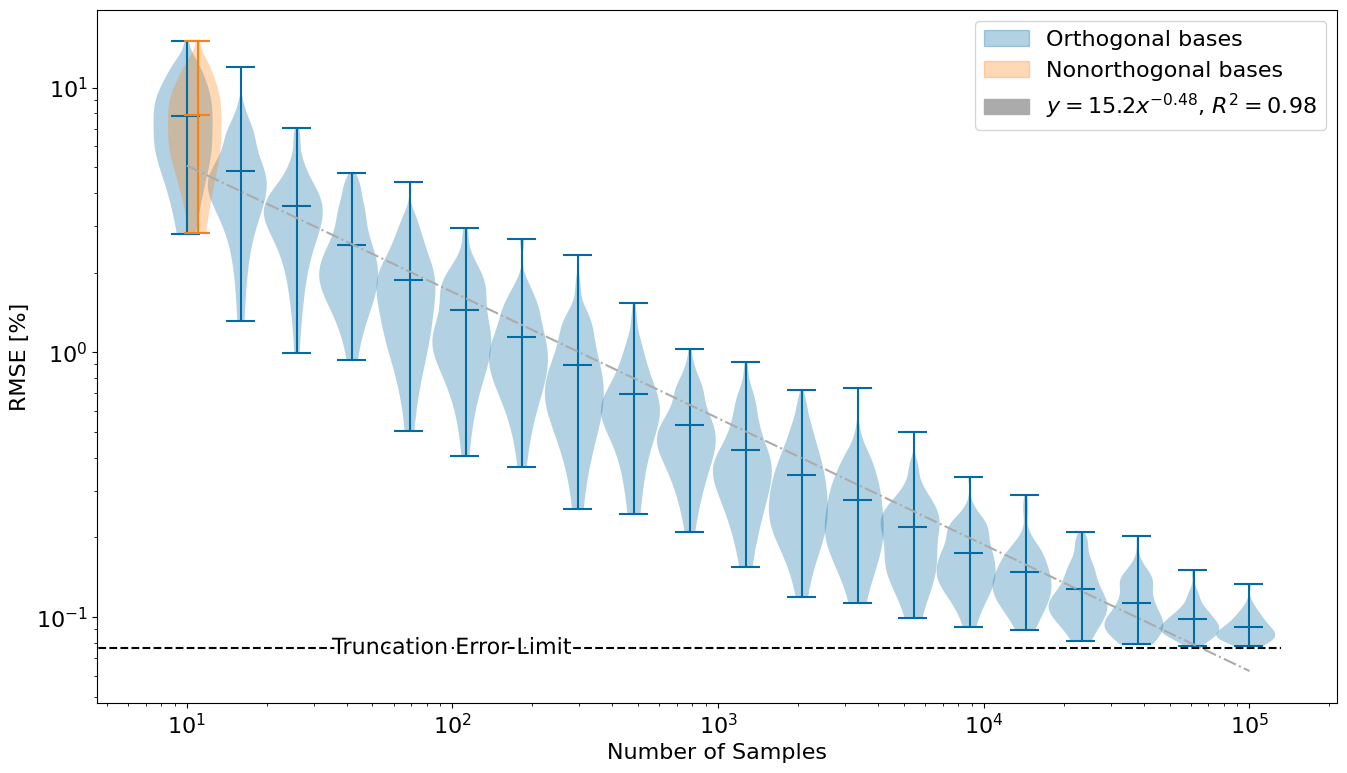

In [65]:
O_14_LIMIT = 0.07651166303158025

# from SO
labels = []
def add_label(violin, label):
    if isinstance(violin, dict):
        color = violin["bodies"][0].get_facecolor().flatten()
    else:
        color = violin[0].get_color()

    labels.append((mpatches.Patch(color=color), label))
plt.figure(figsize=(16,9))
add_label(plt.violinplot(ortho_data, n_samples, showmeans=True, widths = [0.5 * samples for samples in n_samples]), "Orthogonal bases")
add_label(plt.violinplot(non_ortho_data[0:1], n_samples[0:1] * 1.1, showmeans=True, widths = 5), label="Nonorthogonal bases")

def power_law(x, a, b):
    return a*x + b

#regression
params, _ = curve_fit(power_law, np.log(n_samples), np.log(ortho_means))
a, b = params
print(params)
bound = lambda x: power_law(x, *params)

residuals = np.log(ortho_means) - bound(np.log(n_samples))
ss_res = np.sum(residuals**2)
ss_tot = np.sum((np.log(ortho_means) - np.mean(np.log(ortho_means)))**2)
r_sq = 1 - ss_res / ss_tot

label = f"$y={np.exp(b):.1f}x^{{{a:.2f}}}$, $R^2={{{r_sq:.2f}}}$"

add_label(plt.plot(n_samples, np.exp(bound(np.log(n_samples))), "-."), label)
plt.plot(plt.xlim(),[O_14_LIMIT]*2,  "k--", label="Truncation Error Limit")
labelLines(plt.gca().get_lines(), xvals=[100])
plt.legend(*zip(*labels))
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel("Number of Samples")
plt.ylabel("RMSE [%]")
for ext in {"pdf", "png", "svg"}:
    plt.savefig(f"samples.{ext}")

In [27]:
def power_law(x, a, b):
    return a*x + b
params, _ = curve_fit(power_law, np.log(n_samples), np.log(ortho_means))
print(params)
bound = lambda x: power_law(x, *params)

[-0.47709914  2.72173432]
